# ***LEVEL2-TASK4-RESTAURANT CHAINS***

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df= pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Cognifyz_Task/Dataset .csv")
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [ ]:
restaurant_chains = df.groupby("Restaurant Name").size().reset_index(name="Chain Count")
restaurant_chains = restaurant_chains[restaurant_chains["Chain Count"]>1]

In [ ]:
restaurant_chains = restaurant_chains.sort_values(by="Chain Count", ascending=False)

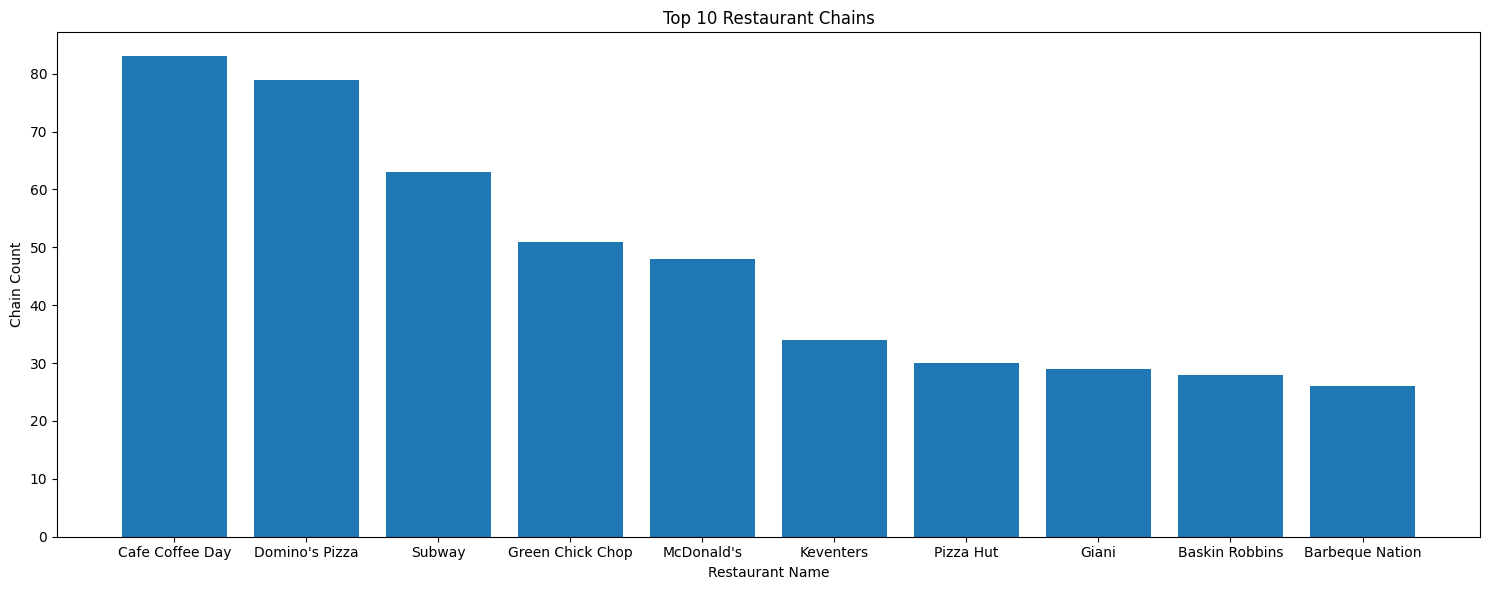

In [ ]:
plt.figure(figsize=(15,6))
plt.bar(restaurant_chains["Restaurant Name"][:10], restaurant_chains["Chain Count"][:10])
plt.xlabel("Restaurant Name")
plt.ylabel("Chain Count")
plt.title("Top 10 Restaurant Chains")
plt.tight_layout()
plt.show()

In [ ]:
chain_ratings = df.groupby("Restaurant Name")["Aggregate rating"].mean().reset_index(name="Average Rating")
chain_votes = df.groupby("Restaurant Name")["Votes"].sum().reset_index(name="Total Votes")

In [ ]:
chain_analysis = pd.merge(chain_ratings, chain_votes, on="Restaurant Name")
chain_analysis = chain_analysis.sort_values(by="Total Votes", ascending=False)

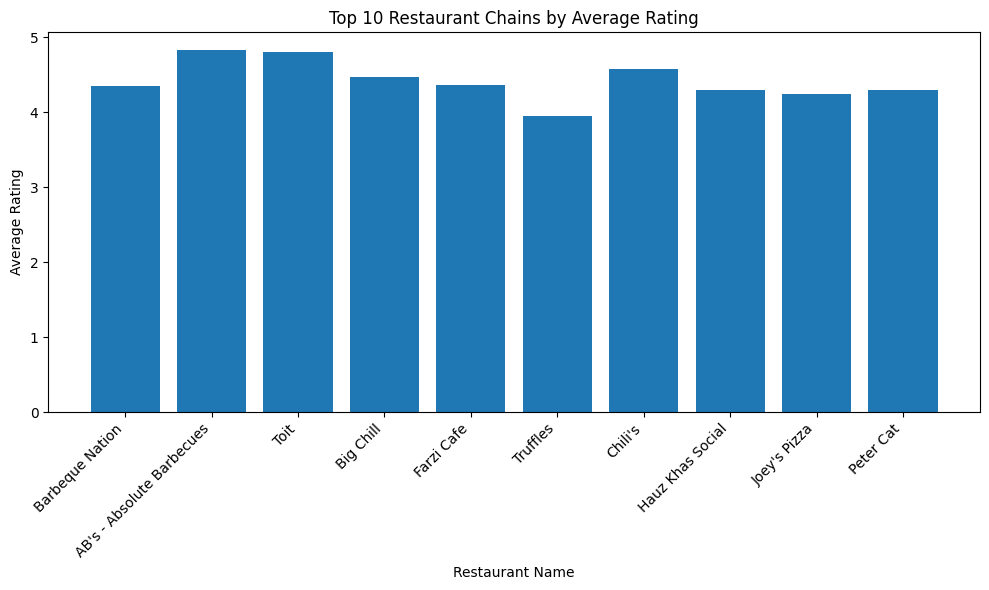

In [ ]:
plt.figure(figsize=(10,6))
plt.bar(chain_analysis["Restaurant Name"][:10], chain_analysis["Average Rating"][:10])
plt.xlabel("Restaurant Name")
plt.ylabel("Average Rating")
plt.title("Top 10 Restaurant Chains by Average Rating")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()